<a href="https://colab.research.google.com/github/lexoz-bedra/probability_and_statistics_labs/blob/main/stats_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (Вариант 2)
Предъявите доверительный интервал уровня 1 - $\alpha$ для указанного параметра при данных предположениях (с математическими обоснованиями). Сгенерируйте 2 выборки объема 25 и посчитайте доверительный интервал. Повторить 1000 раз. Посчитайте, сколько раз 95-процентный доверительный интервал покрывает реальное значение параметра. То же самое сделайте для объема выборки 10000. Как изменился результат? Как объяснить? Что изменяется при росте объемов выборок?

Даны две независимые выборки $X_1$, $X_2$ из нормальных распределений N($\mu_1,\sigma_1^2$), N($\mu_2,\sigma_2^2$) объемов $n_1$, $n_2$ соответственно.

*   $\tau = \mu_1 - \mu_2$ - оцениваемая функция;
*   $\sigma_1^2 = \sigma_2^2$ неизвестна;
*   $\mu_1=2, \mu_2=1, \sigma_1^2=\sigma_2^2=1$ - параметры эксперимента;
*   воспользуйтесь функцией
$$\sqrt\frac{n_1n_2(n_1+n_2-2)}{n_1+n_2} \frac{\bar{X_1}-\bar{X_2}-\tau}{\sqrt{n_1S_*^2(X_1)+n_2S_*^2(X_2)}},$$ где $S_*^2(X_i)$ - выборочная смещенная дисперсия для выборки $X_i$. Смотрите в сторону распределения Стьюдента.


# Задание 2 (Вариант 1)

Постройте асимптотический доверительный интервал уровня $1-\alpha$ для указанного параметра. Проведите эксперимент по схеме, аналогичной первой задаче.


*   Exp($\lambda$) - класс распределений;
*   медиана - оцениваемый параметр;
*   $\lambda=1$ - параметры эксперимента;
* воспользуйтесь предельной теоремой об асимптотическом поведении среднего члена вариационного ряда.



## Решение

Пусть наша выборка – $X_1, ⋯, X_n$ – независимые случайные величины, распределённые по экспоненциальному закону, то есть

$$f(x) = \lambda e^{-\lambda x},$$

$$F(x) = 1 - e^{-\lambda x},$$
$$med(x) = \frac{1}{\lambda} \ln{2} = m$$

\

Посчитаем плотность в точке $q_\alpha$:

$$f(q_\alpha) = f(m) = \lambda e^{-\lambda m}$$

Подставляем $m$ и получаем:

$$f(m) = \lambda e^{-\lambda (\frac{1}{\lambda} \ln{2})} = \lambda e^{-\ln{2}} = \lambda / 2$$

\

Используем теорему об асимптотическом поведении среднего члена вариационного ряда:

$$\sqrt{n}\frac{(X - q_\alpha)}{\sqrt{\alpha(1 - \alpha) }}f(q_\alpha)\rightarrow Y \sim 𝓝(0, 1)$$

\
Подставим $\alpha = 0.5$:

$$\sqrt{n}\frac{(X - m)}{\sqrt{0.5 \cdot 0.5}}f(m)\rightarrow Y \sim 𝓝(0, 1)$$

$$\sqrt{n}\frac{(X - m)}{0.5}\lambda e^{-\lambda m} \rightarrow Y \sim 𝓝(0, 1)$$

$$2\sqrt{n}\cdot(X - m)\cdot λ/2 \rightarrow Y \sim 𝓝(0, 1)$$

Исходя из того, что $S_*^2 \to Var(X)$ при $n \to \infty$, можем записать $\frac{1}{\lambda} = S_*:$

$$2\sqrt{n}\cdot(X - m)\cdot \frac{1}{S_*} \rightarrow Y \sim 𝓝(0, 1)$$

\

Найдём квантили $q_{\alpha/2}$ и $q_{1-\alpha/2}$:

$$P(-q_{\alpha/2} \leq Y \leq q_{1-\alpha/2}) = 1 - \alpha$$

$$P(-q_{\alpha/2} \leq 2\sqrt{n}\cdot(X - m)\cdot \frac{1}{S_*} \leq q_{1-\alpha/2}) = 1 - \alpha$$

$$P(X - \frac{S_*q_{1-\alpha/2}}{2\sqrt{n}} \leq m \leq X + \frac{S_*q_{\alpha/2}}{2\sqrt{n}}) = 1 - \alpha$$

\

Получаем асимптотический доверительный интервал:

$$\left(X - \frac{S_*q_{1-\alpha/2}}{2\sqrt{n}},\ X + \frac{S_*q_{\alpha/2}}{2\sqrt{n}} \right)$$


## Эксперимент

Проведём эксперимент по следующей схеме:

* Сгенерируем 2 выборки по 25 независимых экспоненциально распределённых случайных величин с параметром $\lambda = 1$ и посчитаем для каждой доверительные интервалы. Проделаем то же самое 1000 раз. Посмотрим, сколько раз 95-процентный доверительный интервал покрывает полученный.

* Проделаем все действия заново, но с выборками объёма 10000. Посмотрим на изменение результата и объясним.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import expon, mode, norm

In [ ]:
def conf_interval(sample, conf_level=0.95):
    n = len(sample)
    sample_median = np.median(sample)
    z = norm.ppf(1 - (1 - conf_level) / 2)
    se = 1 / (lambda_param * np.sqrt(2 * n))
    return sample_median - z * se, sample_median + z * se

In [ ]:
lambda_param = 1
true_median = np.log(2) / lambda_param
sample_sizes = [25, 10000]
iterations = 1000
confidence_level = 0.95
results = []
median_estimates = {}

for size in sample_sizes:
    median_estimates[size] = []
    for _ in range(iterations):
        sample = expon(scale=1/lambda_param).rvs(size=size)
        median_estimates[size].append(np.median(sample))

    max_sample_median = np.max(median_estimates[size])
    min_sample_median = np.min(median_estimates[size])
    mean_of_sample_medians = np.mean(median_estimates[size])

    results.append({
        'Sample Size': size,
        'True Median': true_median,
        'Max Sample Median': max_sample_median,
        'Min Sample Median': min_sample_median,
        'Mean of Sample Medians': mean_of_sample_medians,
    })

results_df = pd.DataFrame(results)
results_df

,Sample Size,True Median,Max Sample Median,Min Sample Median,Mean of Sample Medians
0,25,0.693147,1.973262,0.30984,0.711510
1,10000,0.693147,0.723568,0.66245,0.693377


In [ ]:
coverage_counts = {}
intervals = {}

for size in sample_sizes:
    coverage_counts[size] = 0
    intervals[size] = []
    for _ in range(iterations):
        sample = expon.rvs(scale=1/lambda_param, size=size)
        ci_lower, ci_upper = conf_interval(sample, confidence_level)
        intervals[size].append((ci_lower, ci_upper))
        if ci_lower <= true_median <= ci_upper:
            coverage_counts[size] += 1


    coverage_rate = coverage_counts[size] / iterations
    print(f'Sample Size = {size}: Coverage Rate = {coverage_rate:.2f}')

Sample Size = 25: Coverage Rate = 0.82
Sample Size = 10000: Coverage Rate = 0.84


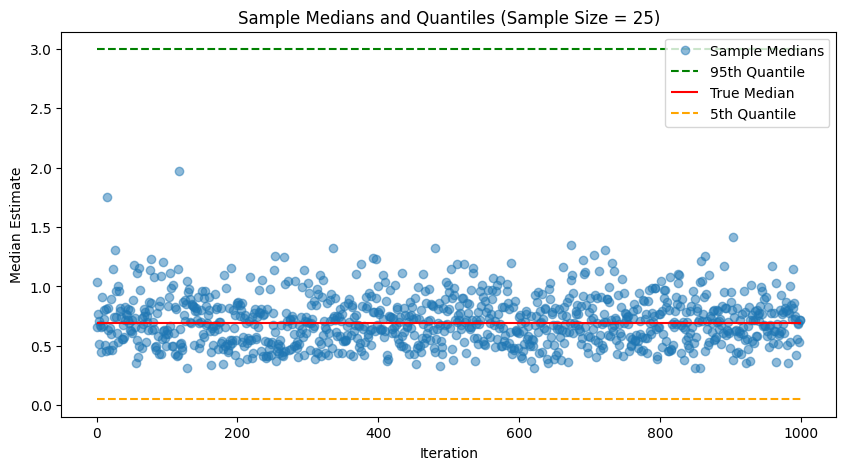

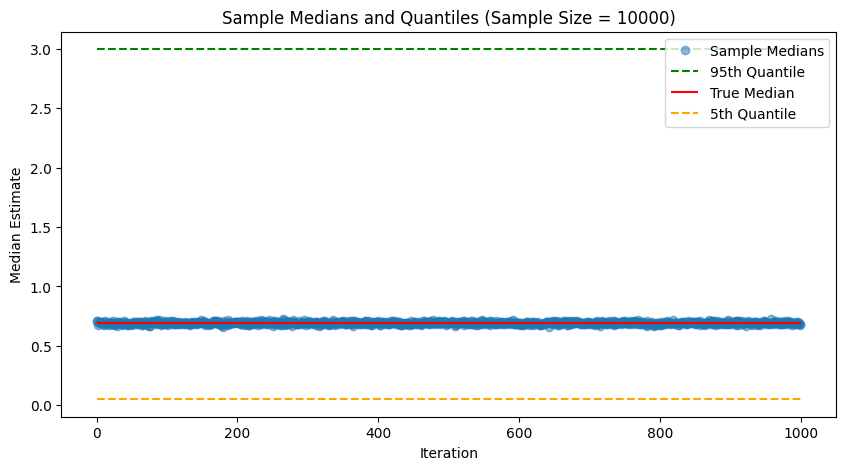

In [ ]:
quantile_95 = expon.ppf(0.95, scale=1/lambda_param)
quantile_5 = expon.ppf(0.05, scale=1/lambda_param)

for size in sample_sizes:
    conf_intervals = intervals[size]
    lower_bounds, upper_bounds = zip(*conf_intervals)
    plt.figure(figsize=(10, 5))
    plt.plot(range(iterations), median_estimates[size], 'o', label='Sample Medians', alpha=0.5)
    plt.hlines(quantile_95, 0, iterations, colors='g', linestyles='dashed', label='95th Quantile')
    plt.hlines(true_median, 0, iterations, colors='red', label='True Median')
    plt.hlines(quantile_5, 0, iterations, colors='orange', linestyles='dashed', label='5th Quantile')
    plt.title(f'Sample Medians and Quantiles (Sample Size = {size})')
    plt.xlabel('Iteration')
    plt.ylabel('Median Estimate')
    plt.legend()
    plt.show()

Мы увидели, что при объёме 10000 разброс значений меньше, и они находятся дальше от границ 95-го доверительного интервала, чем при объёме 25. Мы можем говорить о том, что при увеличении выборки сужается доверительный интервал, и значение выборочной медианы сильнее приближается к теоретическому (состоятельность оценки выборочной медианы).